<a href="https://colab.research.google.com/github/HarshadNSuthar/Aaboost-on-iris-data/blob/master/Hotstar_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

A digital companu (eg. Hotstar, Voot) had launched a show initially, the show got good response, but then witnessed a decline in viewership. The company wants to figuure out what went wrong.

**Posible Reason for decline in viewership for particular show**

1> Decline in number of people coming platform

2> Fewer people watching video

3> Decrease in Marketing spend

4> Competitive shows, eg. cricket/IPL

5> Special Holidays

6> Twist in story

In [0]:
#Importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#importing Datasets

from google.colab import files

In [11]:
uploaded = files.upload()

Saving Hotstar.csv to Hotstar.csv


In [12]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Hotstar.csv" with length 3981 bytes


In [0]:
import pandas as pd
import io


In [0]:
media = pd.read_csv(io.StringIO(uploaded['Hotstar.csv'].decode('utf-8')))

media = media.drop('Unnamed: 7',axis = 1)

In [15]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [16]:
#importing required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%natplotlib inline

UsageError: Line magic function `%natplotlib` not found.


In [0]:
#convert to datetime format
media['Date'] = pd.to_datetime(media['Date'])

In [33]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


#multiple linear regression Y=m1x1+m2x2..+C 

In [0]:
# Deriving "days since the show started"
from datetime import datetime

d0 = datetime(2017, 2, 28)

d1 = media.Date
delta = d1 - d0
media['day']= delta


In [36]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [0]:
#cleaning days from the day column
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [38]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


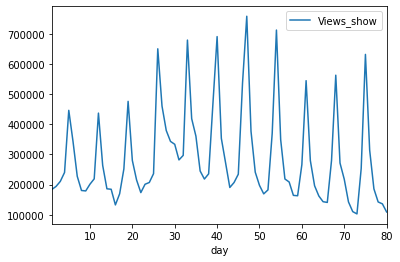

In [39]:
# days vs Views_show
media.plot.line(x='day', y='Views_show')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


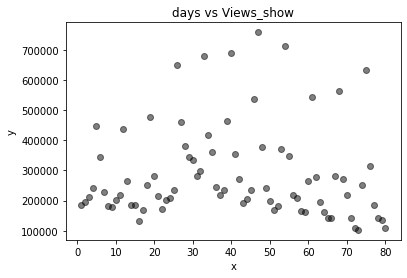

In [40]:
#scatter plot (days vs Views_show)

colors = (0,0,0)
area = np.pi*3                                                                        
plt.scatter(media.day, media.Views_show, c=colors, alpha = 0.5)
plt.title("days vs Views_show")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

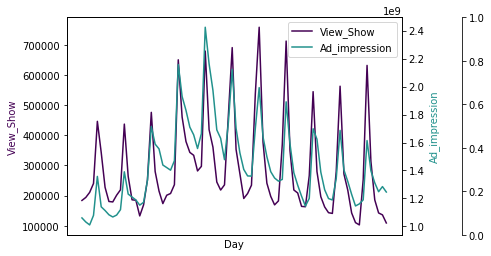

In [41]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [42]:
# Derived Matrics
# Weekdays are takes such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


**Running first model (lm1) Weekday & visitors**

In [0]:
# Putting feature variable to x
x= media[['Visitors','weekday']]

# Putting response variable to y
y = media['Views_show']

In [0]:
from sklearn.linear_model import  LinearRegression

In [0]:
# Representing Linear Regression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [46]:
# fit the model to the training data
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
import statsmodels.api as sn

In [48]:
#unline sklearn, statsmodel don't automatically fit a constant
x = sn.add_constant(x)

# Create fitted model in one line
lm_1 = sn.OLS(y,x).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           8.01e-12
Time:                        04:41:29   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

In [50]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


**Running second model(lm2) visitors & weekend**

In [0]:
# Putting feature variable to x
x= media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

In [52]:
#unline sklearn, statsmodel don't automatically fit a constant
import statsmodels.api as sn
x = sn.add_constant(x)

# Create fitted model in one line
lm_1 = sn.OLS(y,x).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           2.51e-12
Time:                        04:42:40   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Running third model (lm3) visitors, weekend & Character_A

In [0]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = media['Views_show']

In [54]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.53e-14
Time:                        04:43:04   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# Create lag variable (impact of previous day views on current day view)
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)

In [56]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


**Running fourth model (lm4) visitors, Character_A, Lag_views & weekend**

In [0]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [58]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           3.16e-21
Time:                        04:43:58   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


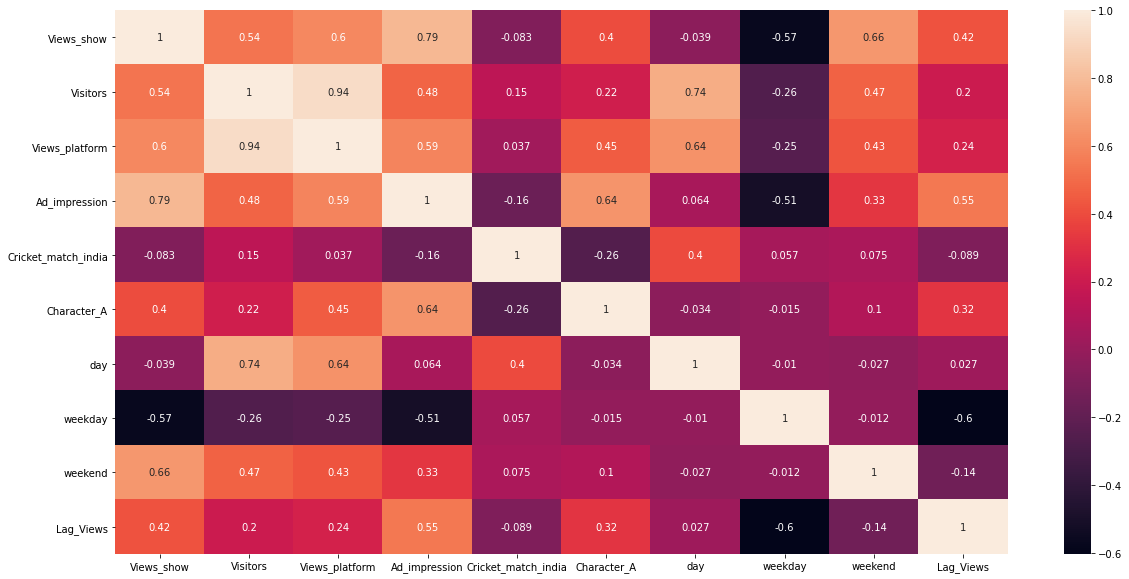

In [59]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(media.corr(),annot = True)

**Running fifth model (lm5) Character_A, weekend & Views_platform**

In [0]:
# Putting feature variable to X
X = media[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = media['Views_show']

In [61]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           3.59e-15
Time:                        04:46:22   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Running fifth model (lm6) Character_A, weekend & Views_platform**

In [0]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

In [0]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

In [72]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.05e-26
Time:                        05:01:47   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
# Making predictions using the model
X = media[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [75]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4677651616.2534075
r_square_value : 0.802643446857565


Text(0, 0.5, 'Views')

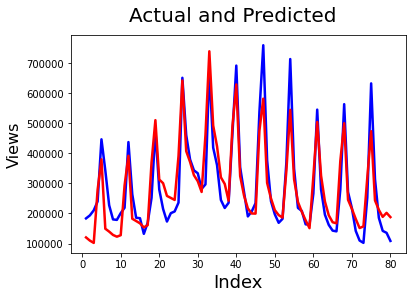

In [76]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

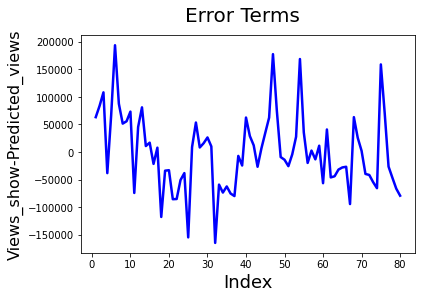

In [77]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

In [78]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_6.predict(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [80]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 3.898242455583519e+17
r_square_value : -16447219.901920771


Text(0, 0.5, 'Views_show-Predicted_views')

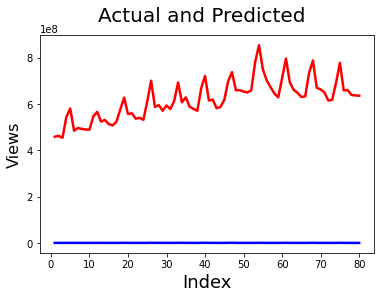

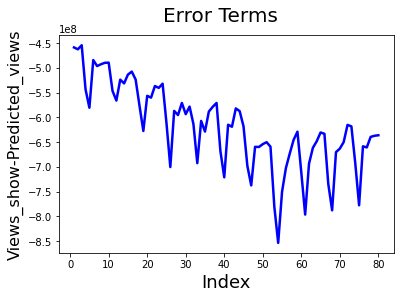

In [82]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label